In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


1. Defining Model parameters

In [10]:
embedding_dim = 64
max_len = 50
num_classes = 1 

2. Defining a function to compile, train and evaluate the two models.

We optimize training with binary cross-entropy loss and Adam optimizer for training

In [11]:
def compile_and_train(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
 
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return history

Model 1: LSTM-based Model

We convert tokens to dense vectors, while ignoring padding

LSTM Layer: Processes the sequential data to learn temporal patterns

Dropout Layer: Adds regularization to prevent overfitting

Dense Output Layer: Sigmoid activation outputs a probability for the binary classification

In [12]:
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, mask_zero=True),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

print("Training LSTM-based Model")
lstm_history = compile_and_train(lstm_model, X_train_padded, y_train, X_test_padded, y_test)


Training LSTM-based Model
Epoch 1/10


c:\Users\barta\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8717 - loss: 0.4492 - val_accuracy: 0.9675 - val_loss: 0.1036
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9922 - loss: 0.0455 - val_accuracy: 0.9720 - val_loss: 0.0798
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9980 - loss: 0.0138 - val_accuracy: 0.9686 - val_loss: 0.0895
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9980 - loss: 0.0111 - val_accuracy: 0.9720 - val_loss: 0.0934
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9731 - val_loss: 0.1053
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.9883
Precision: 0.9933
Recall: 0.9255
F1 Score: 0.9582


Model 2: GRU-based Model



In [13]:
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, mask_zero=True),
    GRU(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

print("Training GRU-based Model")
gru_history = compile_and_train(gru_model, X_train_padded, y_train, X_test_padded, y_test)


Training GRU-based Model
Epoch 1/10


c:\Users\barta\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8579 - loss: 0.4497 - val_accuracy: 0.9753 - val_loss: 0.1047
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9870 - loss: 0.0484 - val_accuracy: 0.9821 - val_loss: 0.0764
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9765 - val_loss: 0.1034
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9999 - loss: 0.0029 - val_accuracy: 0.9798 - val_loss: 0.0979
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9787 - val_loss: 0.0977
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.9874
Precision: 0.9804
Recall: 0.9317
F1 Score: 0.9554


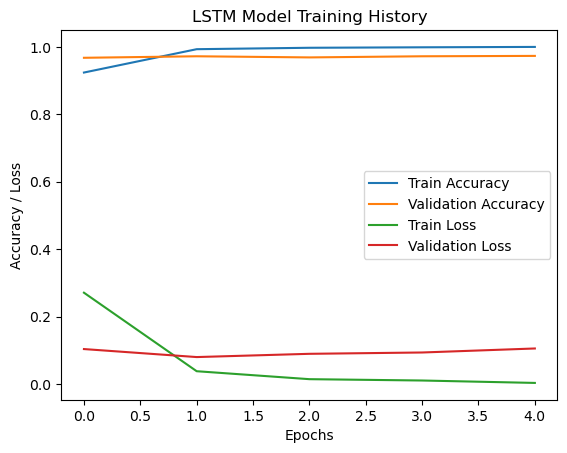

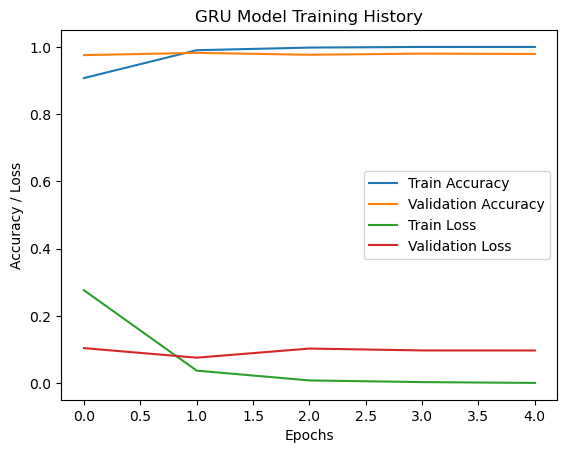

In [14]:
# Plotting function
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

# Plotting for LSTM model
plot_training_history(lstm_history, "LSTM Model Training History")

# Plotting for GRU model
plot_training_history(gru_history, "GRU Model Training History")

LSTM Model: 

The accuracy curves for both training and validation data reach high levels (close to 1.0), indicating good performance in identifying spam and ham messages.

The loss curves decrease and stabilize, showing the model's ability to minimize error over epochs. The gap between training and validation loss is minimal, suggesting low overfitting.

GRU Model
Similar to the LSTM model, both accuracy curves reach high levels, demonstrating effective learning.

The loss also decreases and stabilizes with a minimal gap between training and validation losses, suggesting that the GRU model generalizes well without significant overfitting.